In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/MSadriAghdam/Berlin_Flats/main/berlin_flats.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Region,Condition,Rooms,Rent,Year_Construction,Space
52,52,Prenzlauer,first_time_use,2.0,2251.00,2019,79.05
315,315,Kreuzberg,mint_condition,2.0,1181.30,2019,60.55
672,672,Tiergarten,first_time_use,3.0,2622.90,2019,121.15
333,333,Mitte,first_time_use,2.0,1493.00,2020,66.00
390,390,Köpenick,first_time_use,1.0,558.06,2019,40.38


In [4]:
df.describe()

,Unnamed: 0,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000,764.000000
mean,381.500000,2.549738,1768.560942,1983.695026,84.656270
std,220.692093,1.010826,1118.263961,48.006060,44.195338
min,0.000000,1.000000,271.250000,1864.000000,14.000000
25%,190.750000,2.000000,1039.500000,1959.000000,55.097500
50%,381.500000,2.500000,1565.480000,2015.000000,77.600000
75%,572.250000,3.000000,2170.000000,2019.000000,104.450000
max,763.000000,7.000000,14207.000000,2020.000000,413.910000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         764 non-null    int64  
 1   Region             764 non-null    object 
 2   Condition          764 non-null    object 
 3   Rooms              764 non-null    float64
 4   Rent               764 non-null    float64
 5   Year_Construction  764 non-null    int64  
 6   Space              764 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 41.9+ KB


In [6]:
df=df.drop(columns='Unnamed: 0')

In [7]:
df.shape

(764, 6)

In [8]:
df.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [9]:
df.Region.nunique()

10

In [10]:
smallest_space=df[df.Space == df.Space.min()]
smallest_space

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0


In [11]:
largest_space=df[df.Space == df.Space.max()]
largest_space

,Region,Condition,Rooms,Rent,Year_Construction,Space
694,Mitte,mint_condition,5.0,14207.0,2015,413.91


In [12]:
len(df.Region.value_counts())

10

In [13]:
len(df.Condition.value_counts())

9

In [14]:
Condition=pd.get_dummies(df['Condition'])

In [15]:
df.sample(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space
212,Mitte,no_information,3.0,1465.62,1996,75.16
51,Prenzlauer,first_time_use_after_refurbishment,2.0,2724.17,1918,135.68
694,Mitte,mint_condition,5.0,14207.00,2015,413.91
172,Köpenick,well_kept,2.0,719.00,1997,60.00
44,Mitte,first_time_use,3.0,1740.00,2020,75.70


In [16]:
df=df.drop(columns='Condition')

In [17]:
df.sample(5)

,Region,Rooms,Rent,Year_Construction,Space
378,Friedrichsfelde,1.0,993.96,2020,50.33
429,Friedrichsfelde,3.0,982.00,1979,71.41
745,Wedding,1.0,780.00,2018,26.00
188,Wilmersdorf,3.0,1703.00,2020,88.58
31,Charlottenburg,4.0,2230.00,2019,112.26


In [18]:
df.join(Condition)

,Region,Rooms,Rent,Year_Construction,Space,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
0,Mitte,4.0,2659.00,2019,117.20,1,0,0,0,0,0,0,0,0
1,Kreuzberg,1.0,1200.00,2020,29.33,1,0,0,0,0,0,0,0,0
2,Köpenick,2.0,979.00,1997,83.61,0,0,0,0,0,0,0,0,1
3,Wilmersdorf,4.0,1830.22,1900,171.18,0,0,0,0,0,0,0,0,1
4,Kreuzberg,2.0,2272.00,2020,88.27,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Wedding,1.0,959.00,2017,27.80,0,0,0,1,0,0,0,0,0
760,Wedding,1.0,649.00,2017,20.50,0,0,0,1,0,0,0,0,0
761,Wilmersdorf,4.0,2750.00,2017,110.00,0,0,0,1,0,0,0,0,0
762,Köpenick,2.0,1259.00,2017,91.20,0,0,0,0,0,0,0,0,1


In [19]:
Region=pd.get_dummies(df['Region'])

In [20]:
df=df.drop(columns='Region')

In [21]:
df=df.join(Region)

In [22]:
df=df.join(Condition)

In [23]:
df.sample(5)

,Rooms,Rent,Year_Construction,Space,Charlottenburg,Friedrichsfelde,Kreuzberg,Köpenick,Mitte,Neukölln,Prenzlauer,Tiergarten,Wedding,Wilmersdorf,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
44,3.0,1740.00,2020,75.70,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
502,2.0,1834.00,1900,96.44,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
598,2.0,1189.09,2020,57.96,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
642,3.0,1720.00,2018,116.35,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
364,2.0,1040.00,1956,57.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
correlated_df=df.corr()

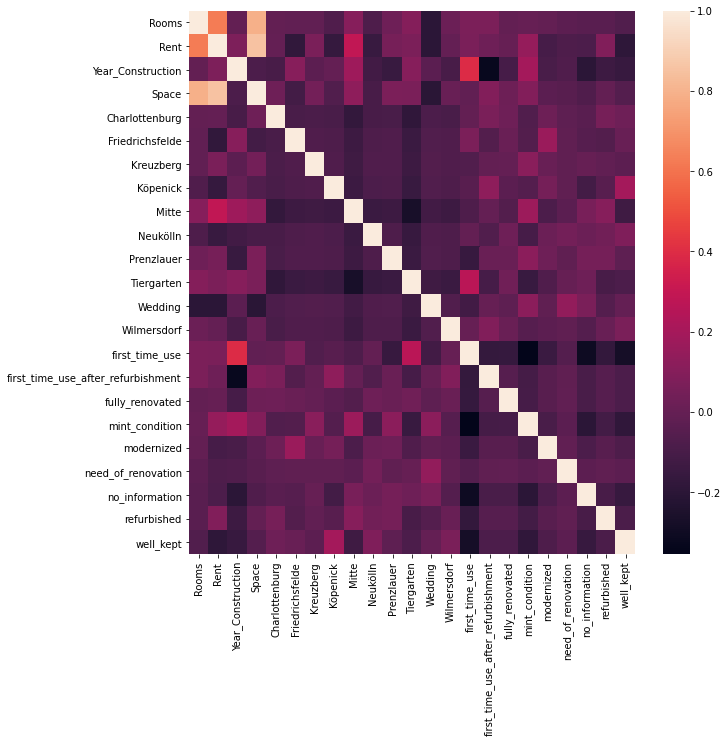

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlated_df)

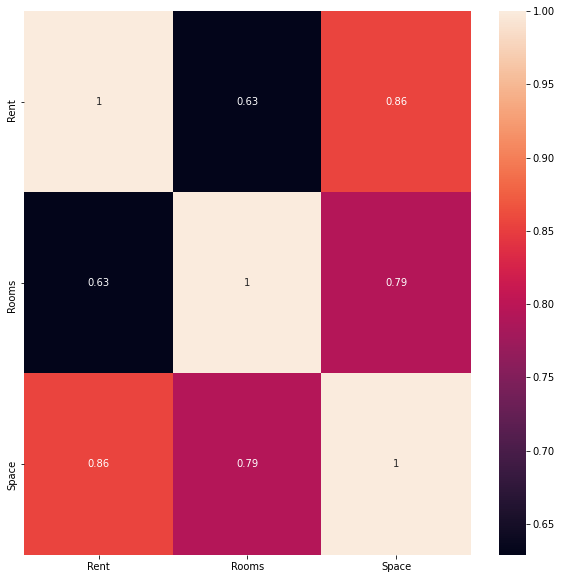

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['Rent','Rooms','Space']].corr(),annot=True)

In [40]:
df=df[['Rent','Rooms','Space']]

In [41]:
df.sample(5)

,Rent,Rooms,Space
85,1520.0,2.0,98.72
105,2000.0,3.0,98.00
409,1650.0,2.0,77.00
63,1629.0,3.0,106.00
313,547.9,2.0,63.00


In [42]:
X=df[['Rooms','Space']]
y=df['Rent']

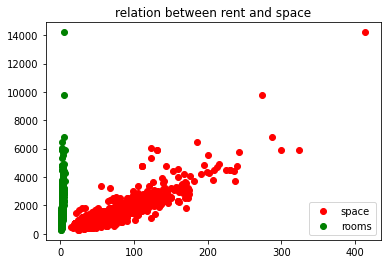

In [74]:
plt.scatter(X['Space'],y,color='red',label='space')
#plt.legend()
plt.title('relation between rent and space')
plt.scatter(X['Rooms'],y,color='green',label='rooms')
plt.legend()

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [78]:
model=LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
score=model.score(X_test,y_test)

In [86]:
print('the score of the primary model is :',str(score)[:4],'%')

the score of the primary model is : 0.73 %
